# Download schematics files

In [1]:
import time
import os.path
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

# Set up Chrome options
chrome_options = Options()
# chrome_options.add_argument("--headless")  # Run Chrome in headless mode
# chrome_options.add_argument("--disable-gpu")
# chrome_options.add_argument("--no-sandbox")

# Set path to chromedriver as per your configuration
# homedir = os.path.expanduser("~")
# webdriver_service = Service(f"{homedir}/chromedriver/stable/chromedriver")
download_dir = f"."

prefs = {
    "download.default_directory": download_dir,
    "download.prompt_for_download": False,
    "download.directory_upgrade": True,
    "safebrowsing.enabled": True,
    "profile.default_content_setting_values.cookies": 1,  # 1:allow, 2:block
    "profile.block_third_party_cookies": False,
    # "profile.default_content_setting_values.cookies": 1,  # 1:allow, 2:block
    # "profile.block_third_party_cookies": True,
    # // block all cookies
    # "profile.default_content_setting_values.cookies": 2,  # 1:allow, 2:block
    # "profile.block_third_party_cookies": True,
}
chrome_options.add_experimental_option("prefs", prefs)

# Choose Chrome Browser
# webdriver_service = Service(f"{homedir}/chromedriver/stable/chromedriver")
browser = webdriver.Chrome(options=chrome_options)
browser.get("https://www.minecraft-schematics.com")

In [ ]:
from tqdm import tqdm

for i in tqdm(range(20860), desc="Downloading Schematics", smoothing=0):
    browser.get(f"https://www.minecraft-schematics.com/schematic/{i}/download/action/?type=schematic")

In [ ]:
browser.quit()


# Display downloaded file

In [13]:
from minecraft_copilot_ml.data_loader import nbt_to_numpy_minecraft_map

numpy_minecraft_map = nbt_to_numpy_minecraft_map(
    "/home/mehdi/minecraft-copilot-ml/minecraft_schematics/210.schematic"
)

In [14]:
numpy_minecraft_map.shape

(7, 14, 13)

In [15]:
from matplotlib import pyplot as plt
import numpy as np

map_unique_values = np.unique(numpy_minecraft_map)
unique_dict = {v: i for i, v in enumerate(map_unique_values)}
unique_dict["minecraft:air"] = 0
map_vectorizeds = np.vectorize(unique_dict.get)(numpy_minecraft_map)
displayed_slice = map_vectorizeds[0, :, :]
# plt.imshow(displayed_slice)
# plt.show()

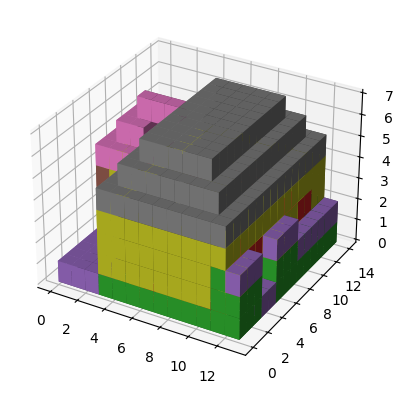

In [16]:
ax = plt.figure().add_subplot(projection="3d")
colors = np.empty(map_vectorizeds.shape, dtype=object)
for i in range(map_vectorizeds.shape[0]):
    for j in range(map_vectorizeds.shape[1]):
        for k in range(map_vectorizeds.shape[2]):
            colors[i, j, k] = f"C{map_vectorizeds[i, j, k]}"
map_vectorizeds = np.transpose(map_vectorizeds, (2, 1, 0))
colors = np.transpose(colors, (2, 1, 0))
ax.voxels(map_vectorizeds, facecolors=colors)
plt.show()

In [35]:
from minecraft_copilot_ml.data_loader import create_noisy_block_map, get_random_block_map_and_mask_coordinates

block_map, (
    random_roll_x_value,
    random_y_height_value,
    random_roll_z_value,
    minimum_width,
    minimum_height,
    minimum_depth,
) = get_random_block_map_and_mask_coordinates(numpy_minecraft_map, 16, 16, 16)
focused_block_map = block_map[
    random_roll_x_value : random_roll_x_value + minimum_width,
    random_y_height_value : random_y_height_value + minimum_height,
    random_roll_z_value : random_roll_z_value + minimum_depth,
]
noisy_focused_block_map = create_noisy_block_map(focused_block_map)
noisy_block_map = block_map.copy()
noisy_block_map[
    random_roll_x_value : random_roll_x_value + minimum_width,
    random_y_height_value : random_y_height_value + minimum_height,
    random_roll_z_value : random_roll_z_value + minimum_depth,
] = noisy_focused_block_map
mask = np.zeros((16, 16, 16), dtype=bool)
mask[
    random_roll_x_value : random_roll_x_value + minimum_width,
    random_y_height_value : random_y_height_value + minimum_height,
    random_roll_z_value : random_roll_z_value + minimum_depth,
] = True

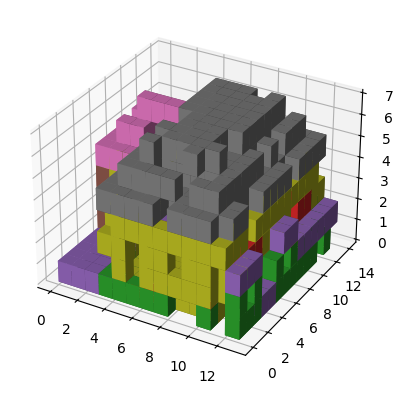

In [36]:
map_vectorizeds = np.vectorize(unique_dict.get)(noisy_focused_block_map)

ax = plt.figure().add_subplot(projection="3d")
colors = np.empty(map_vectorizeds.shape, dtype=object)
for i in range(map_vectorizeds.shape[0]):
    for j in range(map_vectorizeds.shape[1]):
        for k in range(map_vectorizeds.shape[2]):
            colors[i, j, k] = f"C{map_vectorizeds[i, j, k]}"
map_vectorizeds = np.transpose(map_vectorizeds, (2, 1, 0))
colors = np.transpose(colors, (2, 1, 0))
ax.voxels(map_vectorizeds, facecolors=colors)
plt.show()